<a href="https://colab.research.google.com/github/AlexanderF048/GOIT_DS/blob/main/HW_10_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import tensorflow

from tensorflow import keras
from keras.datasets import fashion_mnist

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras import optimizers
from keras import losses
from keras import metrics

import keras.backend

from keras.applications.vgg16 import VGG16, preprocess_input
from keras.utils import img_to_array, array_to_img, to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
#x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

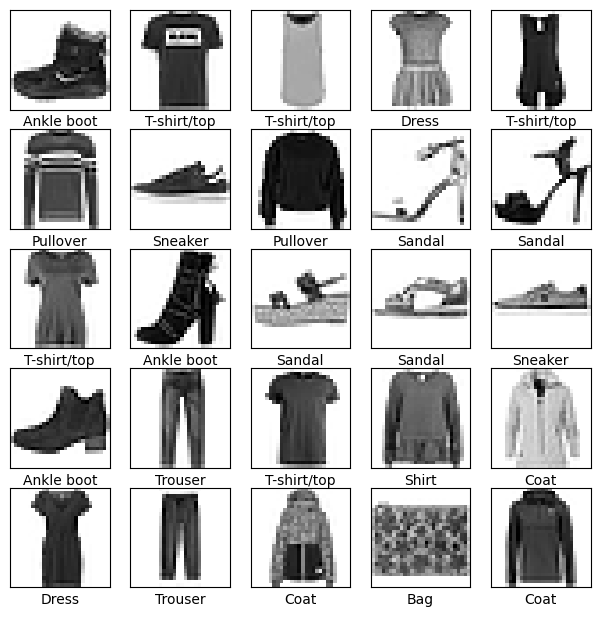

In [4]:
plt.figure(figsize=(7.5,7.5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [5]:
model = Sequential([
    Conv2D(32, (3, 3),
           activation="relu",
           input_shape=(28, 28, 1),
           dilation_rate=(1, 1),
           padding="same",
           ),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3),
           activation="relu",
           dilation_rate=(1, 1),
           padding="same",
           ),
    MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3),
           activation="relu",
           dilation_rate=(1, 1),
           padding="same",
           ),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation="relu"),

    Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

In [6]:
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss= losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [7]:
history = model.fit(
    x_train,
    y_train,
    epochs=8,
    batch_size=30,
    validation_split=0.2, #20% на тестовые экземпляры
)

print('---------------------------------------------------------------------------------------------------------------------')
print(history.history.keys())

Epoch 1/8


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1600/1600 [==============================] - 16s 5ms/step - loss: 0.4712 - accuracy: 0.8265 - val_loss: 0.3187 - val_accuracy: 0.8822
Epoch 2/8
1600/1600 [==============================] - 7s 4ms/step - loss: 0.2928 - accuracy: 0.8932 - val_loss: 0.3262 - val_accuracy: 0.8823
Epoch 3/8
1600/1600 [==============================] - 8s 5ms/step - loss: 0.2510 - accuracy: 0.9097 - val_loss: 0.2533 - val_accuracy: 0.9076
Epoch 4/8
1600/1600 [==============================] - 6s 4ms/step - loss: 0.2247 - accuracy: 0.9171 - val_loss: 0.2625 - val_accuracy: 0.9113
Epoch 5/8
1600/1600 [==============================] - 8s 5ms/step - loss: 0.2077 - accuracy: 0.9256 - val_loss: 0.2679 - val_accuracy: 0.9014
Epoch 6/8
1600/1600 [==============================] - 7s 4ms/step - loss: 0.1969 - accuracy: 0.9294 - val_loss: 0.2598 - val_accuracy: 0.9076
Epoch 7/8
1600/1600 [==============================] - 7s 4ms/step - loss: 0.1866 - accuracy: 0.9342 - val_loss: 0.2781 - val_accuracy: 0.9043
Epoch 8/

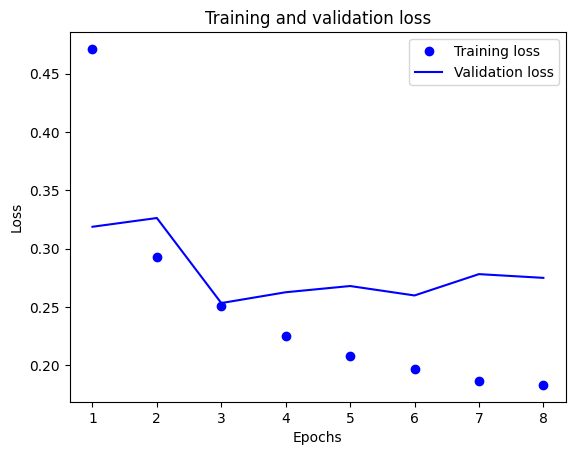

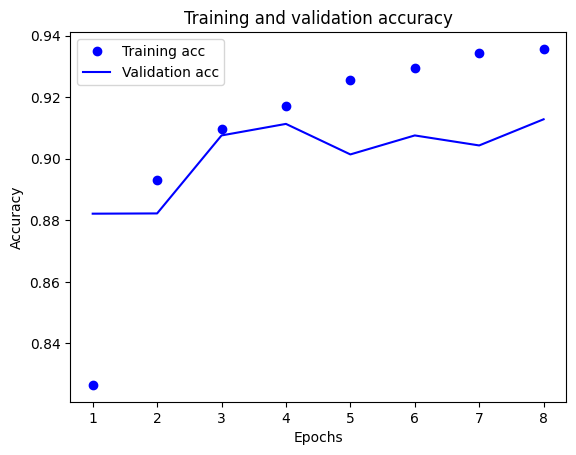

In [8]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

1/1 [==============================] - 0s 186ms/step
[[4.3118636e-13 2.7706033e-14 3.6916248e-16 5.0165699e-14 5.4976287e-13
  7.5931700e-07 5.5165779e-13 5.8199987e-07 1.0346538e-13 9.9999869e-01]]


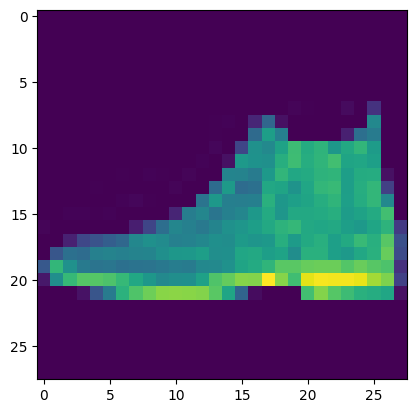

In [9]:
result = model.predict(x_test[:1])
print(result)
plt.imshow(x_test[:1].reshape(28, 28, 1))

**VGG16**

---



In [10]:
conv_base = VGG16(weights="imagenet", include_top=False,
                  input_shape=(48, 48, 3),
                  classes=784,
    classifier_activation="relu")
conv_base.trainable = False
conv_base.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

In [11]:
# Reshape images as per the tensor format required by tensorflow
X_train = x_train
print(X_train[1].shape)
print(X_train.shape)
print("------------------------------------------------------------------------")

X_train = X_train.reshape([-1, 784]) # Возвращаем в array
print(X_train.shape)
print("------------------------------------------------------------------------")

X_train = np.dstack([X_train] * 3) # 2D в 3D
print(X_train.shape)
print("------------------------------------------------------------------------")

X_train = X_train.reshape(-1, 28,28,3)
print(X_train.shape)

print("------------------------------------------------------------------------")
X_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in X_train])
print(X_train[1].shape)
print(X_train.shape)


(28, 28)
(60000, 28, 28)
------------------------------------------------------------------------
(60000, 784)
------------------------------------------------------------------------
(60000, 784, 3)
------------------------------------------------------------------------
(60000, 28, 28, 3)
------------------------------------------------------------------------
(48, 48, 3)
(60000, 48, 48, 3)


In [12]:
X_train = preprocess_input(X_train)

In [ ]:
#Y_train = to_categorical(y_train)

In [13]:
modelVGG16 = Sequential([
    conv_base,

    Flatten(),
    Dense(128, activation="relu"),

    Dense(10, activation="softmax")
])

modelVGG16.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 14,781,642
Trainable params: 66,954
Non-trainable params: 14,714,688
_________________________________________________________________


In [14]:
modelVGG16.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss= losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [15]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block1_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [16]:
historyVGG16 = modelVGG16.fit(
    X_train,
    y_train,
    epochs=100,
    steps_per_epoch=1000,
    validation_steps=100,
    batch_size=30,
    validation_split=0.2, #20% на тестовые экземпляры
)

print('---------------------------------------------------------------------------------------------------------------------')
print(historyVGG16.history.keys())

Epoch 1/100
1000/1000 [==============================] - 15s 13ms/step - loss: 2.4224 - accuracy: 0.1170 - val_loss: 2.3188 - val_accuracy: 0.1123
Epoch 2/100
1000/1000 [==============================] - 13s 13ms/step - loss: 2.3104 - accuracy: 0.1319 - val_loss: 2.2990 - val_accuracy: 0.1020
Epoch 3/100
1000/1000 [==============================] - 13s 13ms/step - loss: 2.2567 - accuracy: 0.1470 - val_loss: 2.2495 - val_accuracy: 0.1500
Epoch 4/100
1000/1000 [==============================] - 13s 13ms/step - loss: 2.2247 - accuracy: 0.1623 - val_loss: 2.2062 - val_accuracy: 0.1683
Epoch 5/100
1000/1000 [==============================] - 13s 13ms/step - loss: 2.1999 - accuracy: 0.1754 - val_loss: 2.1986 - val_accuracy: 0.1843
Epoch 6/100
1000/1000 [==============================] - 13s 13ms/step - loss: 2.1818 - accuracy: 0.1829 - val_loss: 2.1744 - val_accuracy: 0.1800
Epoch 7/100
1000/1000 [==============================] - 13s 13ms/step - loss: 2.1667 - accuracy: 0.1918 - val_loss: 2

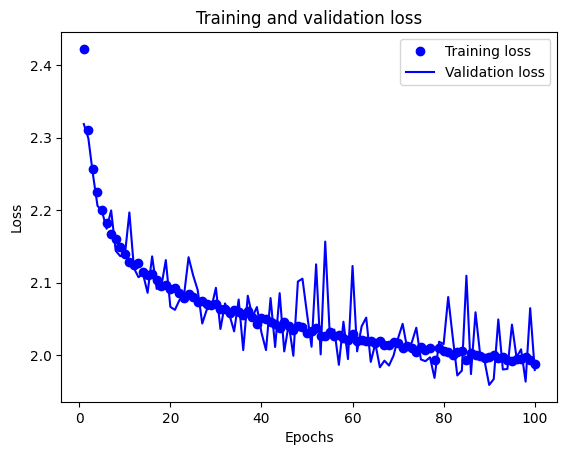

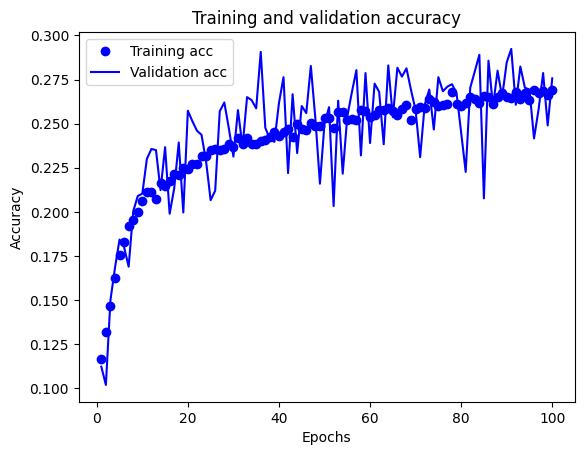

In [17]:
historyVGG16_dict = historyVGG16.history
loss_values = historyVGG16_dict['loss']
val_loss_values = historyVGG16_dict['val_loss']

epochs = range(1, len(historyVGG16_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = historyVGG16_dict['val_accuracy']
plt.plot(epochs, historyVGG16_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, historyVGG16_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()